In [1]:
from xenonnt_plot_style import XENONPlotStyle as xps
xps.use('xenonnt')

import appletree as apt
import aptext
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

XLA_PYTHON_CLIENT_PREALLOCATE is set to false
XLA_PYTHON_CLIENT_ALLOCATOR is set to platform
Using aptext package from https://github.com/XENONnT/applefiles


In [2]:
apt.clear_cache()
context = apt.Context.from_backend('/home/ykaminaga/gamma_apt/sr1_rn220_fitting.h5')

rn220_llh's map s2_cut_acc is using the parameter s2_cut_acc_sigma.
rn220_llh's map s1_cut_acc is using the parameter s1_cut_acc_sigma.
rn220_llh's map s1_eff_n_hits_3f is using the parameter s1_eff_n_hits_3f_sigma.
With h5 backend /home/ykaminaga/gamma_apt/sr1_rn220_fitting.h5


In [3]:
config = context.instruct['configs']

In [4]:
config

{'elife': 'elife_bkg_sr1.json',
 'event_building_eff': 'anti_correlation_eff_rn220_sr1.json',
 'posrec_reso': 'posrec_reso_sr0.json',
 's1_bias_3f': '3fold_s1_bias_rn220_sr1.json',
 's1_correction': 's1_correction_sr1.json',
 's1_cut_acc': ['s1_cut_acc_median_rn220_sr1.json',
  's1_cut_acc_lower_rn220_sr1.json',
  's1_cut_acc_upper_rn220_sr1.json'],
 's1_eff_n_hits_3f': ['3fold_recon_eff_n_hits_median_sr0.json',
  '3fold_recon_eff_n_hits_lower_sr0.json',
  '3fold_recon_eff_n_hits_upper_sr0.json'],
 's1_lce': 's1_correction_sr1.json',
 's1_smear_3f': '3fold_s1_smearing_rn220_sr1.json',
 's2_bias': 's2_bias_rn220_sr1.json',
 's2_correction': 's2_correction_sr1.json',
 's2_cut_acc': ['s2_cut_acc_median_rn220_sr1.json',
  's2_cut_acc_lower_rn220_sr1.json',
  's2_cut_acc_upper_rn220_sr1.json'],
 's2_lce': 's2_correction_sr1.json',
 's2_smear': 's2_smearing_rn220_sr1.json'}

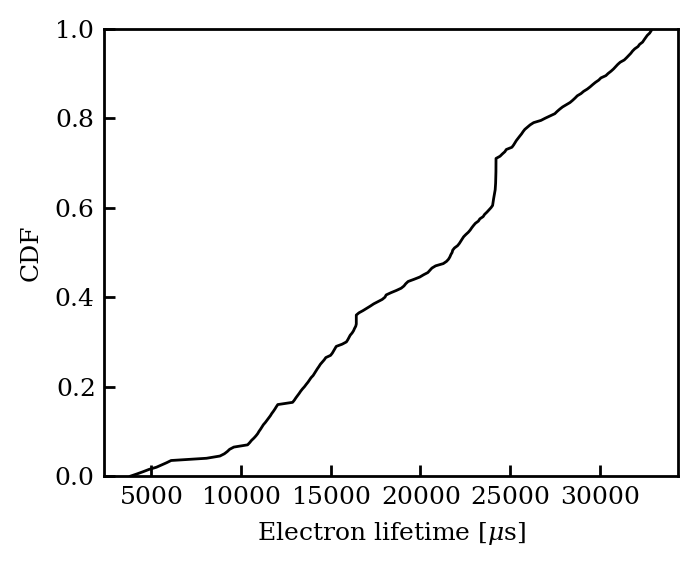

In [5]:
file = apt.load_json(config['elife'])
plt.plot(file['map'], file['coordinate_system'])
plt.ylim(0, 1)
plt.ylabel('CDF')
plt.xlabel(r'Electron lifetime [$\mu$s]')
plt.show()

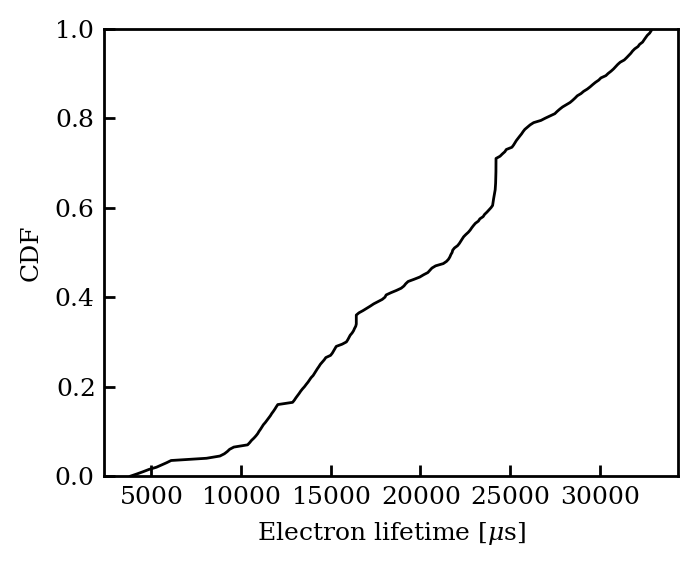

In [14]:
file = apt.load_json(config['elife'])
plt.plot(file['map'], file['coordinate_system'])
plt.ylim(0, 1)
plt.ylabel('CDF')
plt.xlabel(r'Electron lifetime [$\mu$s]')
plt.savefig('./fig/maps/elife.png')
plt.show()

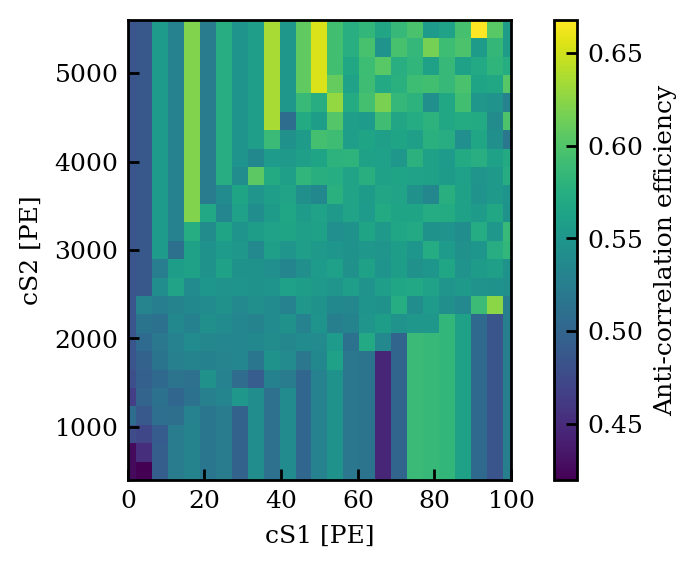

In [7]:
file = apt.load_json(config['event_building_eff'])
Z = np.array(file['map']).T

n0, n1 = Z.shape

plt.pcolormesh(
    np.linspace(file['coordinate_lowers'][0], file['coordinate_uppers'][0], n1),
    np.linspace(file['coordinate_lowers'][1], file['coordinate_uppers'][1], n1),
    Z
)
plt.colorbar(label='Anti-correlation efficiency')
plt.xlim(0, 100)
plt.xlabel('cS1 [PE]')
plt.ylabel('cS2 [PE]')
plt.show()

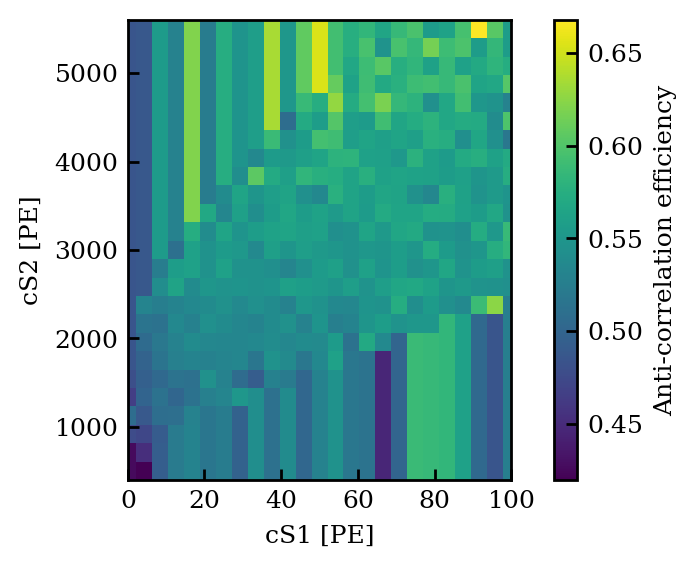

In [36]:
file = apt.load_json(config['event_building_eff'])
Z = np.array(file['map']).T

n0, n1 = Z.shape

plt.pcolormesh(
    np.linspace(file['coordinate_lowers'][0], file['coordinate_uppers'][0], n1),
    np.linspace(file['coordinate_lowers'][1], file['coordinate_uppers'][1], n1),
    Z
)
plt.colorbar(label='Anti-correlation efficiency')
plt.xlim(0, 100)
plt.xlabel('cS1 [PE]')
plt.ylabel('cS2 [PE]')
plt.savefig('fig/maps/anti_corr_eff.png')
plt.show()

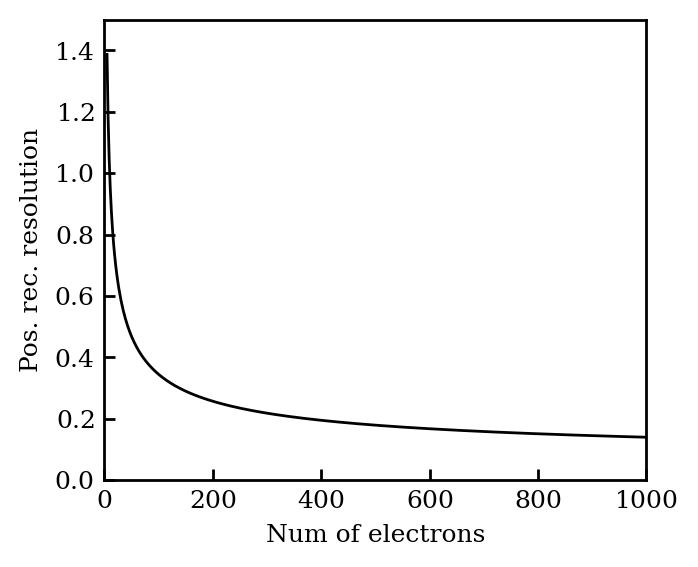

In [46]:
file = apt.load_json(config['posrec_reso'])
plt.plot(file['coordinate_system'], file['map'])
plt.xlabel('Num of electrons')
plt.ylabel('Pos. rec. resolution')
plt.xlim(0, 1000)
plt.ylim(0, 1.5)
plt.savefig('fig/maps/posrec.png')
plt.show()

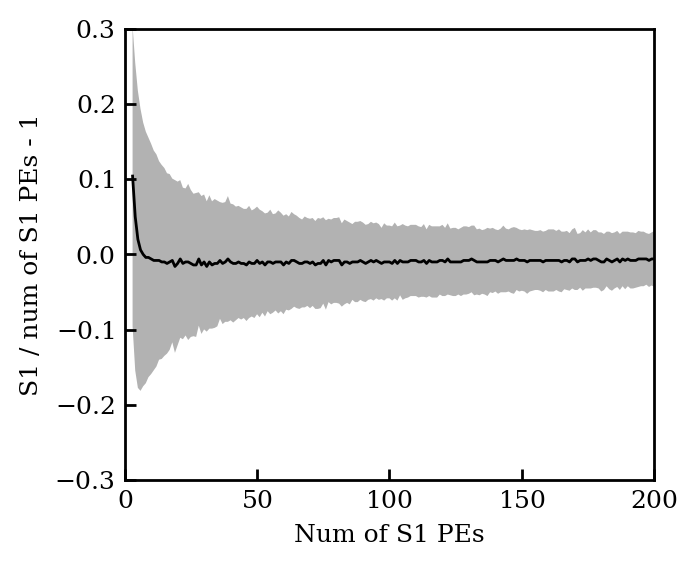

In [53]:
mean = apt.load_json(config['s1_bias_3f'])
plt.plot(mean['coordinate_system'], mean['map'])

std = apt.load_json(config['s1_smear_3f'])
plt.fill_between(std['coordinate_system'],
                 np.array(mean['map']) + np.array(std['map']),
                 np.array(mean['map']) - np.array(std['map']), alpha=0.3)

plt.xlim(0, 200)
plt.ylim(-0.3, 0.3)
plt.xlabel('Num of S1 PEs')
plt.ylabel('S1 / num of S1 PEs - 1')
plt.savefig('fig/maps/s1_bias.png')
plt.show()

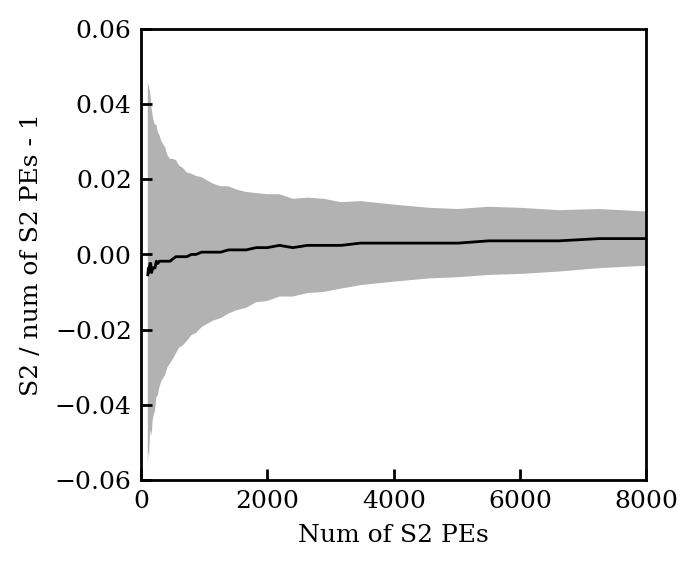

In [55]:
mean = apt.load_json(config['s2_bias'])
plt.plot(mean['coordinate_system'], mean['map'])

std = apt.load_json(config['s2_smear'])
plt.fill_between(std['coordinate_system'],
                 np.array(mean['map']) + np.array(std['map']),
                 np.array(mean['map']) - np.array(std['map']), alpha=0.3)

plt.xlim(0, 8e3)
plt.ylim(-0.06, 0.06)
plt.xlabel('Num of S2 PEs')
plt.ylabel('S2 / num of S2 PEs - 1')
plt.savefig('fig/maps/s2_bias.png')
plt.show()

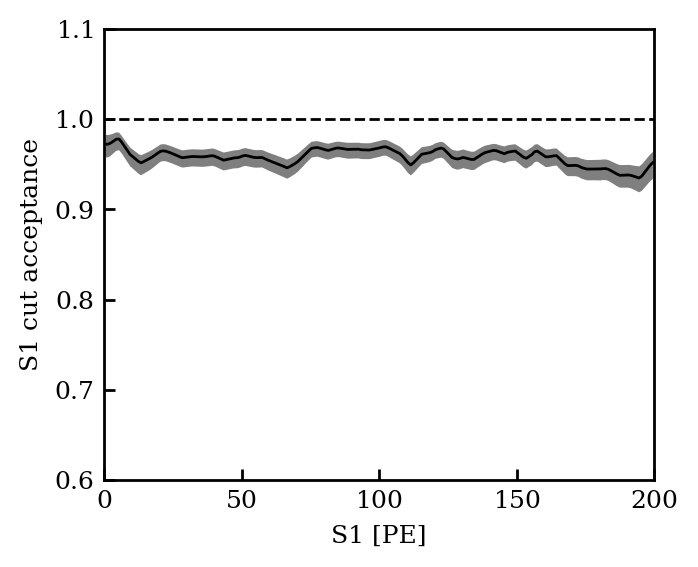

In [64]:
mean = apt.load_json(config['s1_cut_acc'][0])
lower = apt.load_json(config['s1_cut_acc'][1])
upper = apt.load_json(config['s1_cut_acc'][2])
plt.plot(mean['coordinate_system'], mean['map'])
plt.fill_between(mean['coordinate_system'],
                 lower['map'],
                 upper['map'], alpha=0.5)
plt.axhline(1, ls='--')
plt.ylim(0.6, 1.1)
plt.xlim(0, 200)
plt.xlabel('S1 [PE]')
plt.ylabel('S1 cut acceptance')
plt.savefig('fig/maps/s1_cut_acc.png')
plt.show()

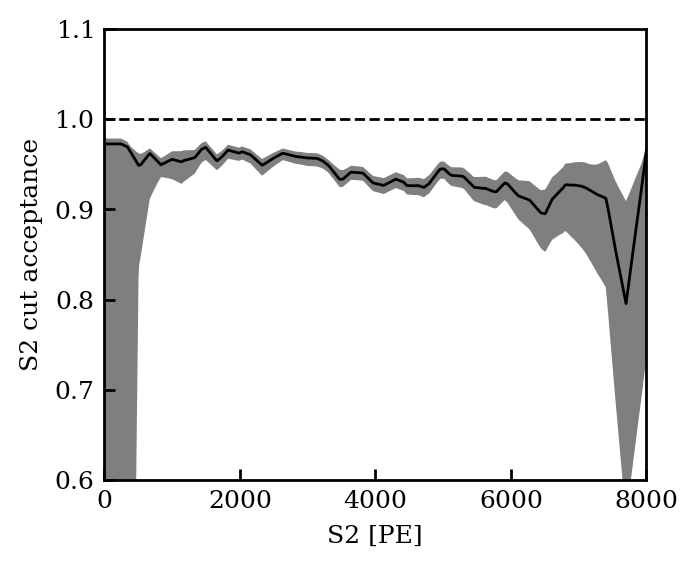

In [68]:
mean = apt.load_json(config['s2_cut_acc'][0])
lower = apt.load_json(config['s2_cut_acc'][1])
upper = apt.load_json(config['s2_cut_acc'][2])
plt.plot(mean['coordinate_system'], mean['map'])
plt.fill_between(mean['coordinate_system'],
                 lower['map'],
                 upper['map'], alpha=0.5)
plt.axhline(1, ls='--')
plt.ylim(0.6, 1.1)
plt.xlim(0, 8e3)
plt.xlabel('S2 [PE]')
plt.ylabel('S2 cut acceptance')
plt.savefig('fig/maps/s2_cut_acc.png')
plt.show()

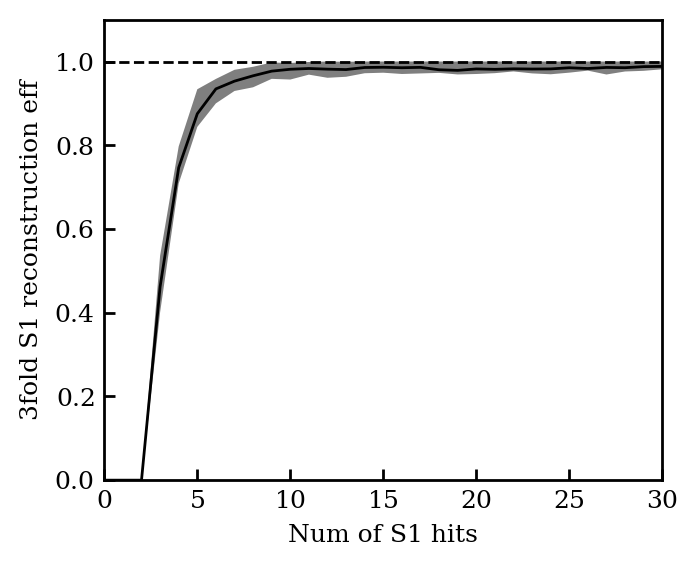

In [73]:
mean = apt.load_json(config['s1_eff_n_hits_3f'][0])
lower = apt.load_json(config['s1_eff_n_hits_3f'][1])
upper = apt.load_json(config['s1_eff_n_hits_3f'][2])
plt.plot(mean['coordinate_system'], mean['map'])
plt.fill_between(mean['coordinate_system'],
                 lower['map'],
                 upper['map'], alpha=0.5)
plt.axhline(1, ls='--')
plt.ylim(0, 1.1)
plt.xlim(0, 30)
plt.xlabel('Num of S1 hits')
plt.ylabel('3fold S1 reconstruction eff')
plt.savefig('fig/maps/s1_recon_eff.png')
plt.show()

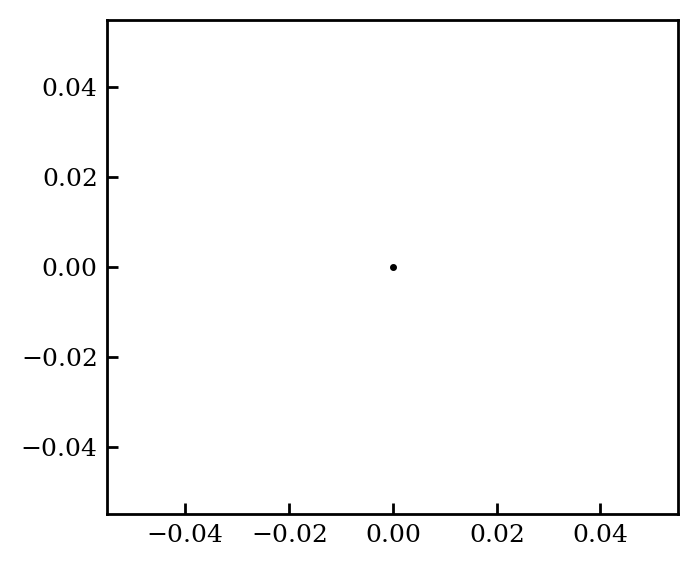

In [74]:
fig, ax = plt.subplots()
p = ax.scatter(0, 0)

In [75]:
p